<a href="https://colab.research.google.com/github/iamafifaah/Flood-Susceptibility-With-Random-Forest/blob/main/Flood_Susceptibility_with_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.3 MB/s eta 0:00:00


In [2]:
pip install pyspatialml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 706.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.1.1
    Uninstalling geopandas-1.1.1:
      Successfully uninstalled geopandas-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.

In [1]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np
import matplotlib as mpl
import geopandas as gpd
import numpy as np
from tempfile import NamedTemporaryFile
import warnings
warnings.filterwarnings('ignore')

In [2]:
from osgeo import gdal
import os
import glob
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio.mask

# Exploratory Data Analysis

####------------------- Stack Layer with Same Extent ---------------------------

In [3]:
!pwd

/content


using glob

In [78]:
raster_list = glob.glob('/content/raster/*.tif')

In [79]:
type(raster_list)

list

In [80]:
print(raster_list)

['/content/raster/MNDWI.tif', '/content/raster/TWI.tif', '/content/raster/rainfall.tif', '/content/raster/rainfall2.tif', '/content/raster/disschannel.tif', '/content/raster/LULC2.tif', '/content/raster/profile_curvature.tif', '/content/raster/aspect.tif', '/content/raster/rainfall3.tif', '/content/raster/nightlight.tif', '/content/raster/TPI.tif', '/content/raster/dissriver.tif', '/content/raster/slope.tif', '/content/raster/NDBI.tif', '/content/raster/NDWI.tif', '/content/raster/plan_curvature.tif', '/content/raster/elevation.tif']


In [81]:
stack = Raster(raster_list)

In [82]:
stack.names

dict_keys(['MNDWI', 'TWI', 'rainfall', 'rainfall2', 'disschannel', 'LULC2', 'profile_curvature', 'aspect', 'rainfall3', 'nightlight', 'TPI', 'dissriver', 'slope', 'NDBI', 'NDWI', 'plan_curvature', 'elevation'])

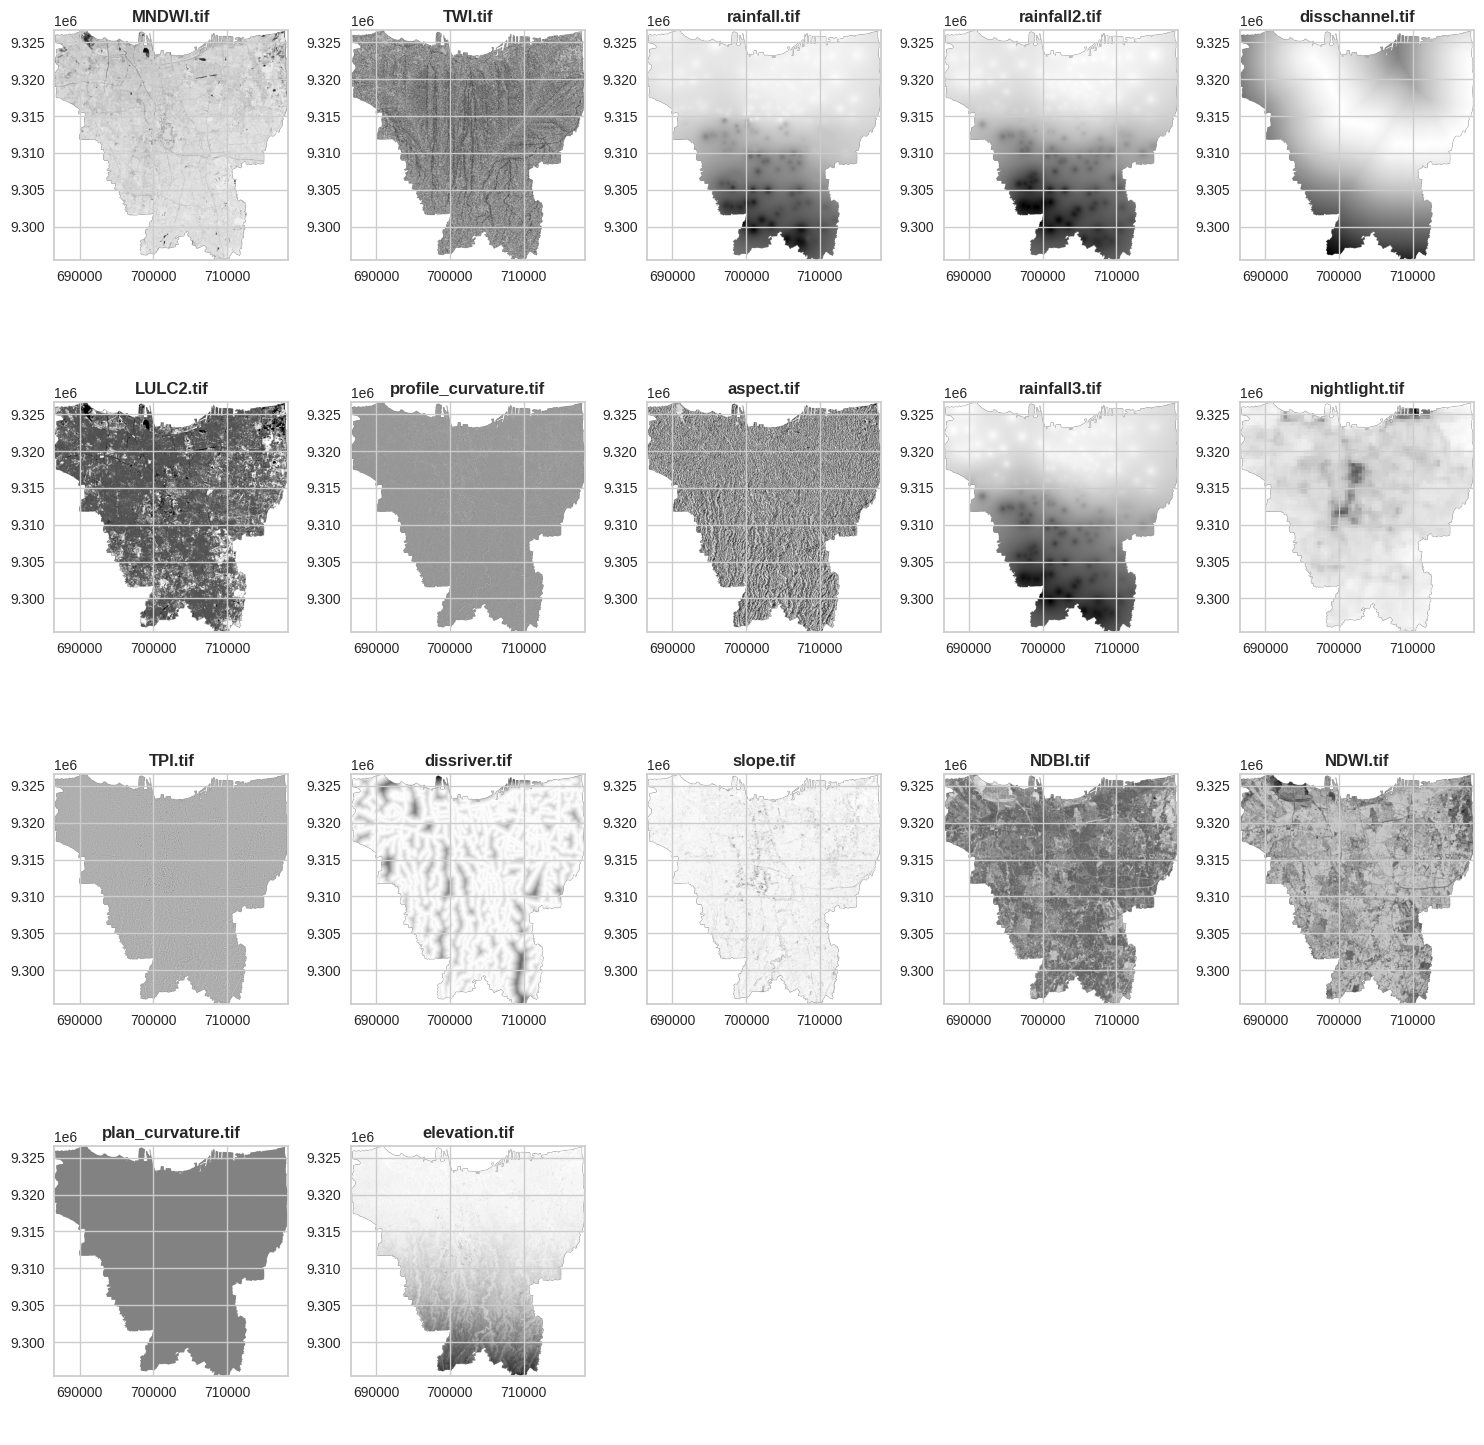

In [84]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))

# Flatten axes agar bisa diakses satu per satu dengan index tunggal
axes = axes.flatten()

for i, path in enumerate(raster_list):
    with rasterio.open(path) as src:
        filename = os.path.basename(path)
        show(src, ax=axes[i], title=filename)

# Turn off empty subplots if any
for j in range(len(raster_list), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [10]:
pip install geopandas

In [85]:
sampling = r'/content/Sampling.shp'

In [86]:
import geopandas as gpd

In [87]:
sampling = gpd.read_file(sampling)

In [88]:
sampling.head()

,OBJECTID,ID,Class,elevation,LULC,MNDWI,NDBI,NDWI,nightlight,plan_curva,...,rainfall3,slope,TPI,TWI,dissriver,disschanne,aspect,LULC2,SPI,geometry
0,1,1,1,19.108100,4.37674,-0.252942,0.076071,-0.017718,56.79,-0.058471,...,4968.52,4.235720,-1.997260,8.54106,375.7670,1382.710,3.280560,4.37674,19203.8,POINT (701369.510 9312695.831)
1,2,2,1,0.484954,4.00000,-0.369595,0.113560,-0.072703,39.97,-0.048496,...,4803.40,1.147960,-4.975890,13.57670,305.5740,401.243,4.035530,4.00000,3889620.0,POINT (700081.126 9314170.987)
2,3,3,1,8.087520,4.00000,-0.334910,0.113120,-0.082920,46.67,0.048002,...,4908.74,1.046090,-0.275937,11.94610,92.0864,975.186,6.155160,4.00000,460295.0,POINT (700121.837 9313451.405)
3,4,4,1,8.575090,4.30783,-0.346720,-0.042982,0.062265,46.67,0.009382,...,4908.17,1.690270,0.761410,28.37690,85.7956,934.938,3.062420,4.30783,-2093650.0,POINT (700129.401 9313462.440)
4,5,5,1,6.835240,1.97934,-0.416964,0.019103,0.002886,42.91,-0.045120,...,4776.97,0.938002,-0.457772,11.83280,54.2461,135.627,0.762576,1.97934,256000.0,POINT (700335.004 9314291.779)


In [89]:
sampling.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

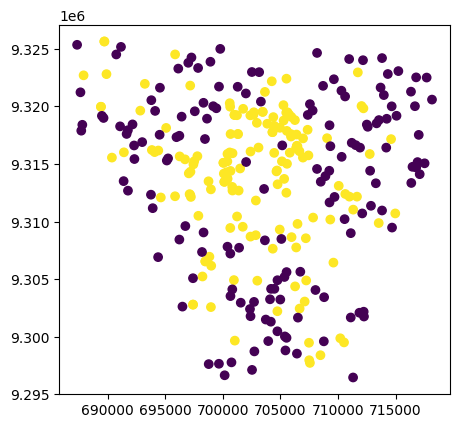

In [16]:
sampling.plot('Class')

In [17]:
kota = gpd.read_file('/content/Kota.shp')

In [18]:
kota.head(2)

,OBJECTID,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,Shape_Leng,Shape_Area,geometry
0,1,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.1_1,Cengkareng,None,None,Kecamatan,Sub-district,3174070,None,31193.629963,2.623779e+07,"POLYGON ((688151.367 9316917.839, 688158.156 9..."
1,2,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.2_1,Grogolpetamburan,None,None,Kecamatan,Sub-district,3174040,None,14181.380194,1.082747e+07,"POLYGON ((697322.416 9315982.077, 697309.738 9..."


In [19]:
kota.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

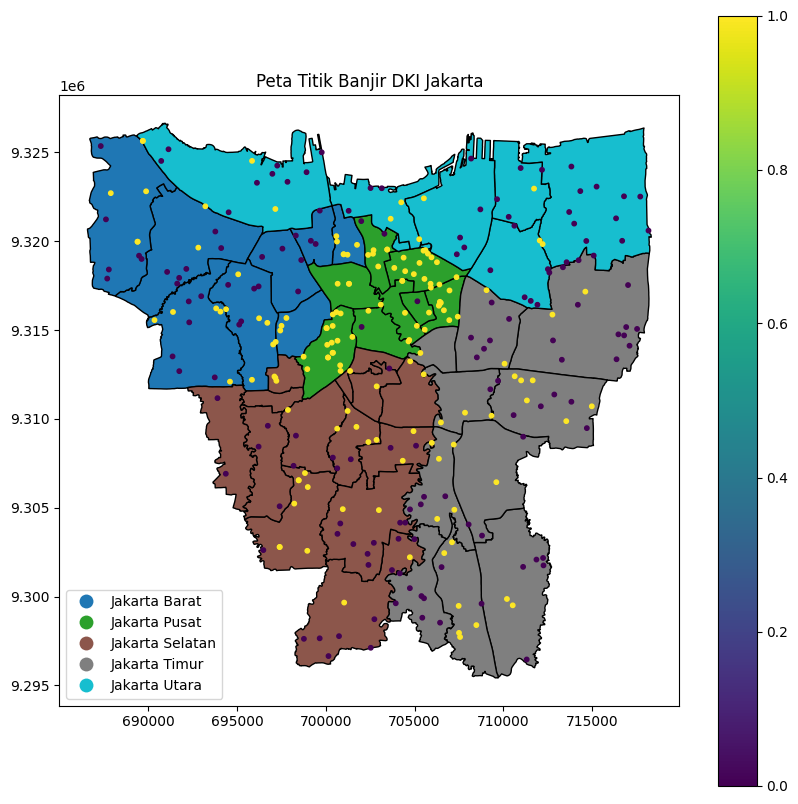

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotkan batas wilayah ke axes
kota.plot(column = 'NAME_2', ax=ax, edgecolor='black', legend = True)

# Plotkan titik banjir ke axes yang sama
sampling.plot(column = 'Class', ax=ax, markersize=10, legend = True)

# Tambahan: memberikan judul dan tampilkan
plt.title("Peta Titik Banjir DKI Jakarta")
plt.show()

### Pada machine learning kali ini, langsung menggunakan data shp sampling
isinya area flood dan non flood, tanpa menggunakan data csv
atau data tidak diekstrak tapi langsung di analisis dengan machine learning

In [ ]:
# sampling.to_file("/content/sampling.shp")

In [ ]:
# sampling.to_csv("/content/sampling.csv")

In [ ]:
# sampling = pd.read_csv("/content/sampling.csv")

### Split Data

In [90]:
sampling.head()

,OBJECTID,ID,Class,elevation,LULC,MNDWI,NDBI,NDWI,nightlight,plan_curva,...,rainfall3,slope,TPI,TWI,dissriver,disschanne,aspect,LULC2,SPI,geometry
0,1,1,1,19.108100,4.37674,-0.252942,0.076071,-0.017718,56.79,-0.058471,...,4968.52,4.235720,-1.997260,8.54106,375.7670,1382.710,3.280560,4.37674,19203.8,POINT (701369.510 9312695.831)
1,2,2,1,0.484954,4.00000,-0.369595,0.113560,-0.072703,39.97,-0.048496,...,4803.40,1.147960,-4.975890,13.57670,305.5740,401.243,4.035530,4.00000,3889620.0,POINT (700081.126 9314170.987)
2,3,3,1,8.087520,4.00000,-0.334910,0.113120,-0.082920,46.67,0.048002,...,4908.74,1.046090,-0.275937,11.94610,92.0864,975.186,6.155160,4.00000,460295.0,POINT (700121.837 9313451.405)
3,4,4,1,8.575090,4.30783,-0.346720,-0.042982,0.062265,46.67,0.009382,...,4908.17,1.690270,0.761410,28.37690,85.7956,934.938,3.062420,4.30783,-2093650.0,POINT (700129.401 9313462.440)
4,5,5,1,6.835240,1.97934,-0.416964,0.019103,0.002886,42.91,-0.045120,...,4776.97,0.938002,-0.457772,11.83280,54.2461,135.627,0.762576,1.97934,256000.0,POINT (700335.004 9314291.779)


In [91]:
sampling = sampling.drop(['OBJECTID','ID','geometry','LULC','SPI'], axis= 1)

In [92]:
sampling.head()

,Class,elevation,MNDWI,NDBI,NDWI,nightlight,plan_curva,profile_cu,rainfall,rainfall2,rainfall3,slope,TPI,TWI,dissriver,disschanne,aspect,LULC2
0,1,19.108100,-0.252942,0.076071,-0.017718,56.79,-0.058471,0.001485,4138.23,3185.28,4968.52,4.235720,-1.997260,8.54106,375.7670,1382.710,3.280560,4.37674
1,1,0.484954,-0.369595,0.113560,-0.072703,39.97,-0.048496,-0.002056,4135.06,3061.03,4803.40,1.147960,-4.975890,13.57670,305.5740,401.243,4.035530,4.00000
2,1,8.087520,-0.334910,0.113120,-0.082920,46.67,0.048002,-0.000568,4138.08,3131.50,4908.74,1.046090,-0.275937,11.94610,92.0864,975.186,6.155160,4.00000
3,1,8.575090,-0.346720,-0.042982,0.062265,46.67,0.009382,0.000180,4138.04,3130.92,4908.17,1.690270,0.761410,28.37690,85.7956,934.938,3.062420,4.30783
4,1,6.835240,-0.416964,0.019103,0.002886,42.91,-0.045120,-0.000991,4112.15,3043.51,4776.97,0.938002,-0.457772,11.83280,54.2461,135.627,0.762576,1.97934


In [93]:
x = sampling.drop('Class', axis=1)

In [94]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elevation   306 non-null    float64
 1   MNDWI       306 non-null    float64
 2   NDBI        306 non-null    float64
 3   NDWI        306 non-null    float64
 4   nightlight  306 non-null    float64
 5   plan_curva  306 non-null    float64
 6   profile_cu  306 non-null    float64
 7   rainfall    306 non-null    float64
 8   rainfall2   306 non-null    float64
 9   rainfall3   306 non-null    float64
 10  slope       306 non-null    float64
 11  TPI         306 non-null    float64
 12  TWI         306 non-null    float64
 13  dissriver   306 non-null    float64
 14  disschanne  306 non-null    float64
 15  aspect      306 non-null    float64
 16  LULC2       306 non-null    float64
dtypes: float64(17)
memory usage: 40.8 KB


In [95]:
y = sampling['Class']

In [96]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 306 entries, 0 to 305
Series name: Class
Non-Null Count  Dtype
--------------  -----
306 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [97]:
import seaborn as sns

In [98]:
def count_categories(feature):
  print(sampling[feature].value_counts())
  plt.figure(figsize=(2, 2))
  sns.countplot(
      x=feature,
      data=sampling,
      palette='Set2'
  )

Class
1    153
0    153
Name: count, dtype: int64


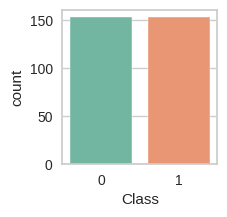

In [99]:
count_categories('Class')

### Correaltions

In [100]:
#### Basic Important Modules ####
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

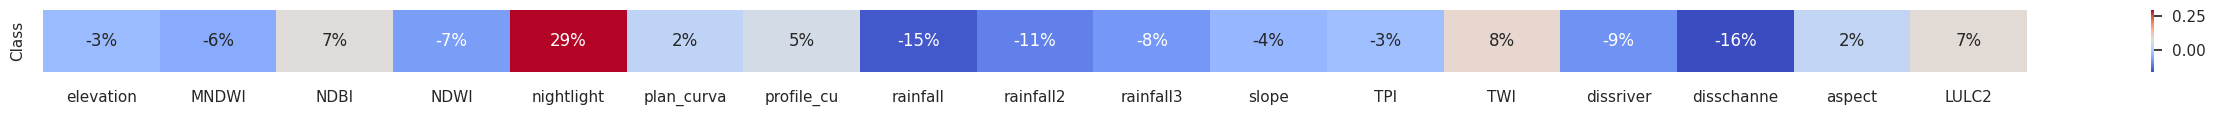

In [101]:
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=sampling.corr('kendall').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

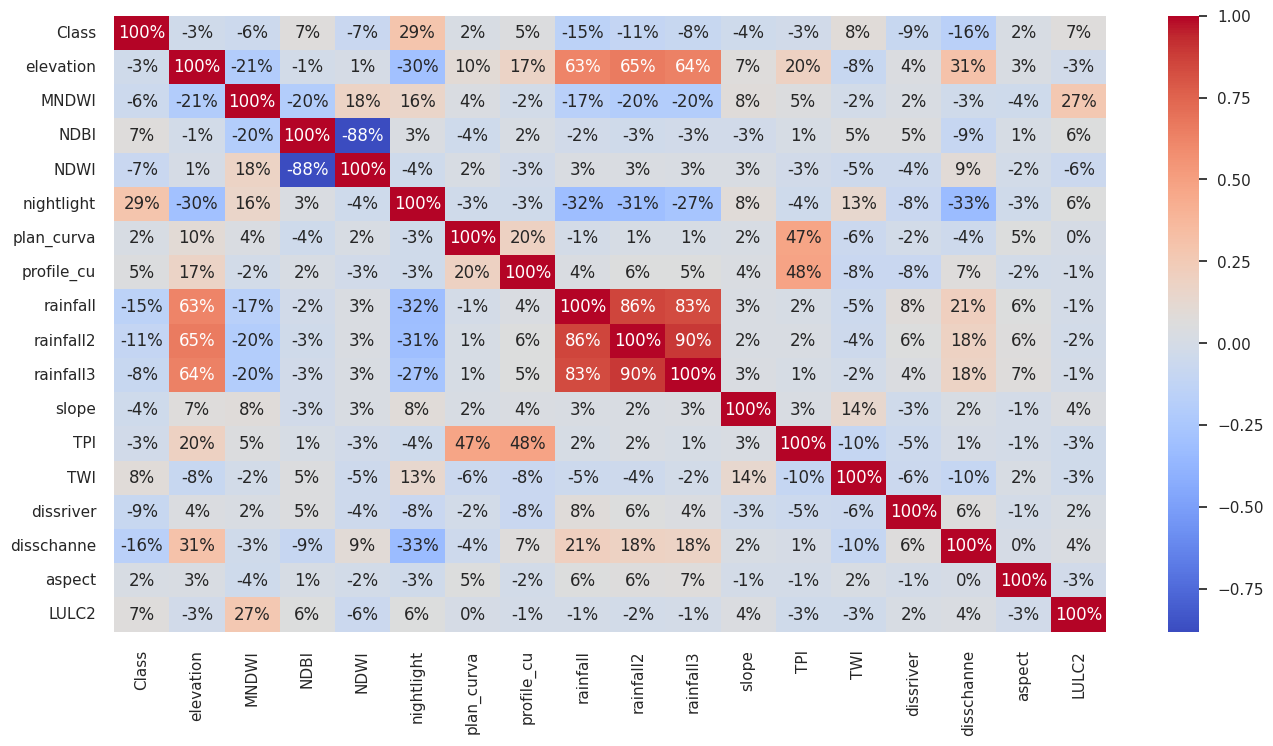

In [102]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(16, 8))
sns.heatmap(
    data=sampling.corr('kendall'),
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

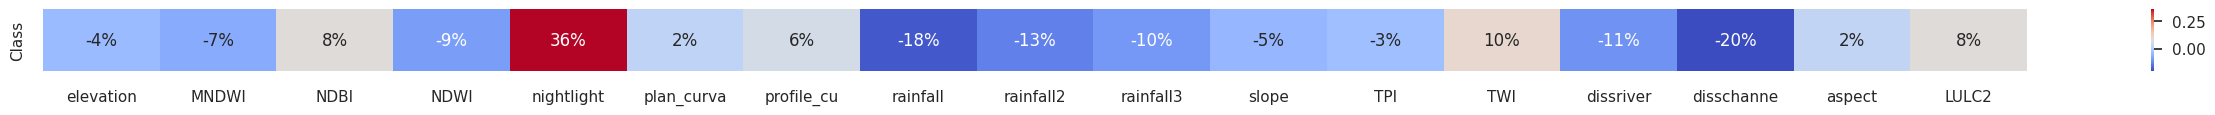

In [103]:
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=sampling.corr('spearman').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

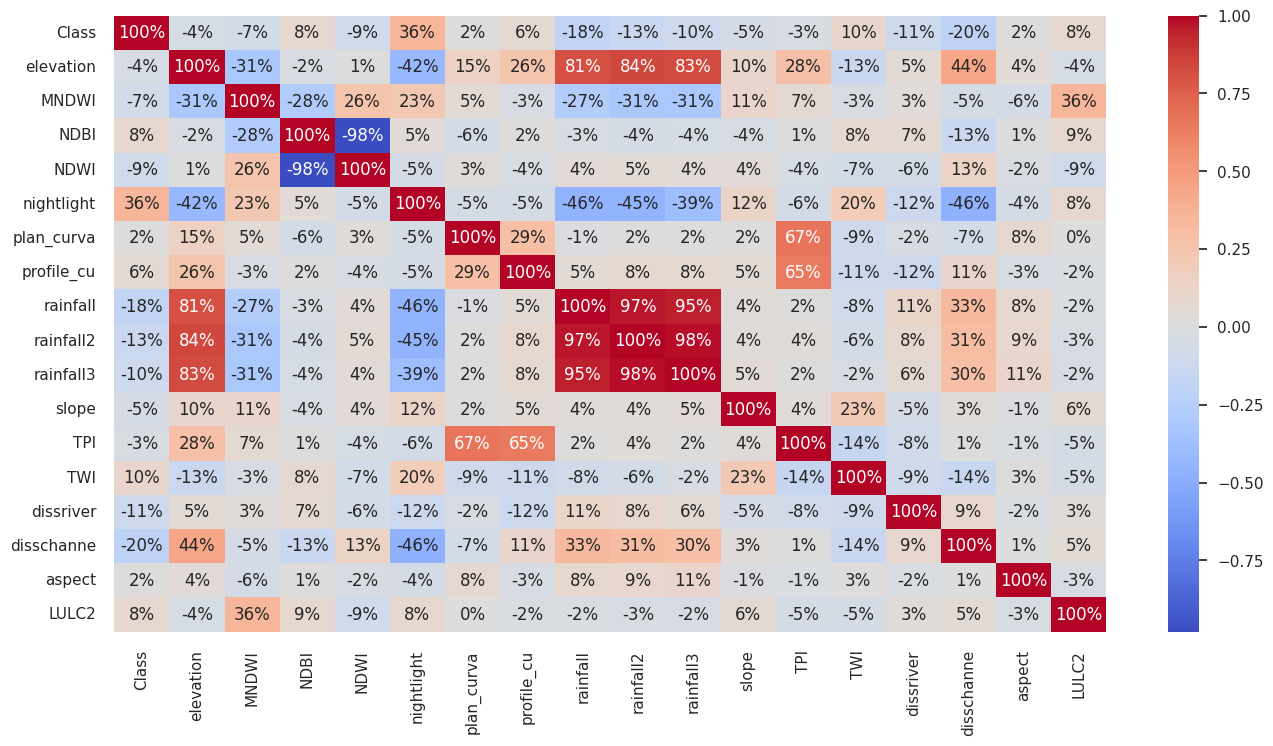

In [104]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(16, 8))
sns.heatmap(
    data=sampling.corr('spearman'),
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

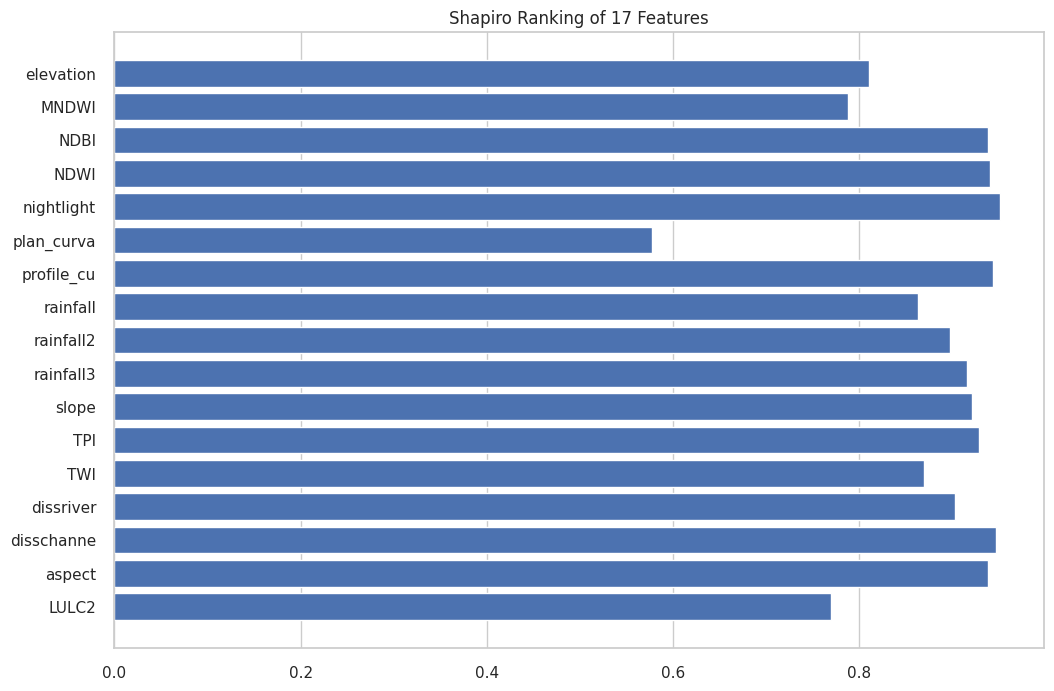

<Axes: title={'center': 'Shapiro Ranking of 17 Features'}>

In [105]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', features= x.columns)
visualizer.fit(x, y)           # Fit the data to the visualizer
visualizer.transform(x.values);        # Transform the data
visualizer.show()              # Finalize and render the figure

In [106]:
from scipy.stats import shapiro
# normality test
def normality_test_shapiro(feature):
  stat, p = shapiro(x[feature].values)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')

In [107]:
for feature in x.columns:
  normality_test_shapiro(feature)

Statistics=0.810, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.788, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.940, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.951, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.577, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.897, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.915, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.921, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.929, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.903, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.947, p=0.000
Sample does not look G

In [108]:
# Anderson-Darling Test
from scipy.stats import anderson

def normality_test_anderson_darling(feature):
  # normality test
  result = anderson(x[feature].values)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
      print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [109]:
for feature in x.columns:
  normality_test_anderson_darling(feature)

Statistic: 21.369
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)
Statistic: 6.114
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)
Statistic: 4.579
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)
Statistic: 4.326
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal

### Nilai input machine learning tidak boleh negatif. Mengapa?

# Start Machine Learning

In [122]:
#### Sckit Learn Specific Modules ####
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [111]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elevation   306 non-null    float64
 1   MNDWI       306 non-null    float64
 2   NDBI        306 non-null    float64
 3   NDWI        306 non-null    float64
 4   nightlight  306 non-null    float64
 5   plan_curva  306 non-null    float64
 6   profile_cu  306 non-null    float64
 7   rainfall    306 non-null    float64
 8   rainfall2   306 non-null    float64
 9   rainfall3   306 non-null    float64
 10  slope       306 non-null    float64
 11  TPI         306 non-null    float64
 12  TWI         306 non-null    float64
 13  dissriver   306 non-null    float64
 14  disschanne  306 non-null    float64
 15  aspect      306 non-null    float64
 16  LULC2       306 non-null    float64
dtypes: float64(17)
memory usage: 40.8 KB


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

# Random Forest

In [113]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [114]:
y_pred_rf = model_rf.predict(x_test)

In [115]:
print(classification_report(y_test, y_pred_rf, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.81      0.76      0.79        46
       flood       0.78      0.83      0.80        46

    accuracy                           0.79        92
   macro avg       0.79      0.79      0.79        92
weighted avg       0.79      0.79      0.79        92



In [116]:
print(accuracy_score(y_test, y_pred_rf))

0.7934782608695652


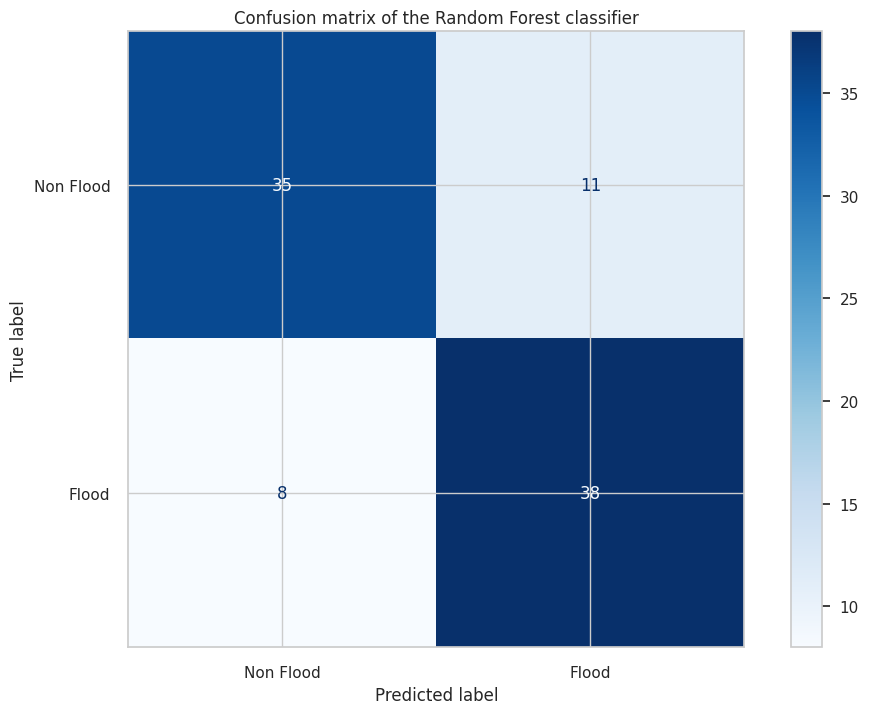

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Random Forest classifier')
plt.show()

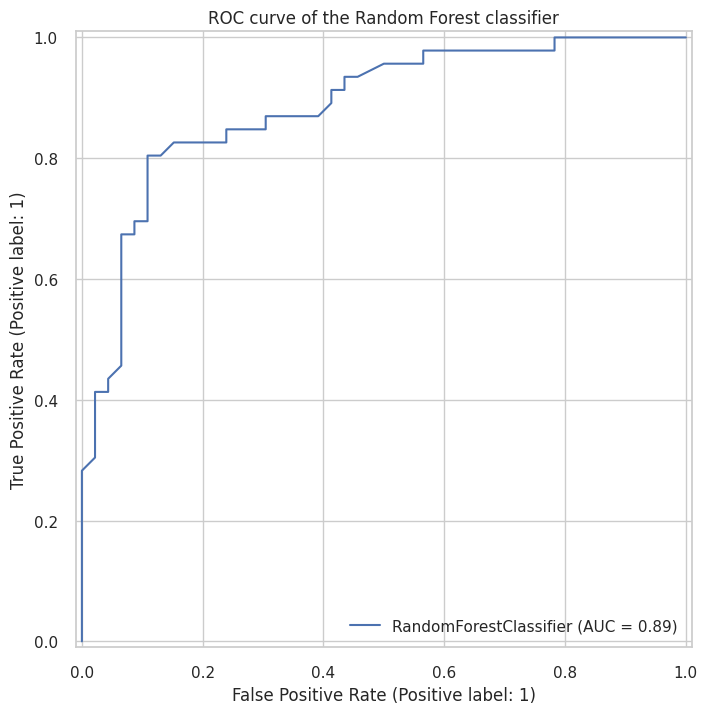

In [118]:
# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_rf, x_test, y_test, #alpha=8,
                               )
plt.title('ROC curve of the Random Forest classifier')
plt.show()

In [123]:
from sklearn.metrics import make_scorer, accuracy_score

In [125]:
from sklearn import metrics

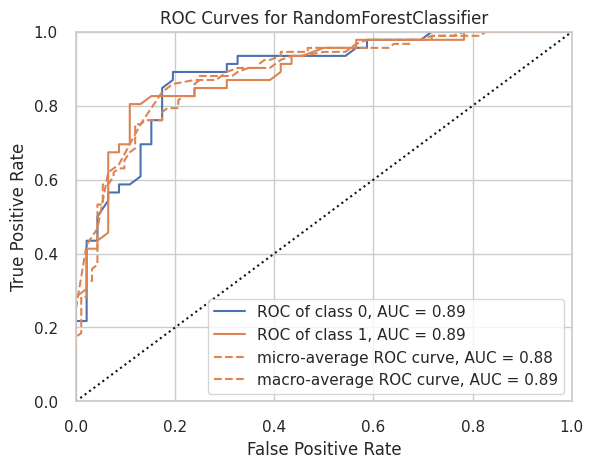

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [128]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    model_rf,
    is_fitted=True
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [135]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, y_pred_rf))

0.5869565217391304


In [129]:
result_rf = stack.predict_proba(model_rf)

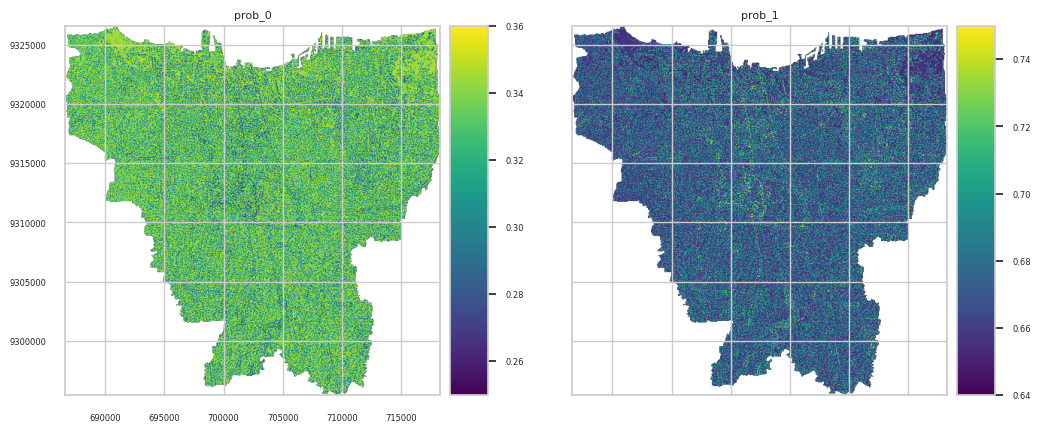

In [130]:
result_rf.plot()
plt.show()

In [194]:
result_rf.write(r"random forest susceptibility.tif")

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [random forest susceptibility.tif, random fore...
2        rows                                               1040
3        cols                                               1057
4         res                                       (30.0, 30.0)
5  nodatavals  [-3.4028234663852886e+38, -3.4028234663852886e...


In [132]:
features_list = list(x.columns)

In [133]:
#importances = list(model_RF.feature_importances_)
feature_imp = pd.Series(model_rf.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

rainfall3     0.138522
rainfall      0.123455
nightlight    0.111022
rainfall2     0.084871
disschanne    0.061146
slope         0.054664
elevation     0.050685
NDWI          0.048580
dissriver     0.045474
NDBI          0.044605
MNDWI         0.040648
TWI           0.039697
plan_curva    0.039535
aspect        0.035592
profile_cu    0.034870
TPI           0.031385
LULC2         0.015250
dtype: float64


<Axes: >

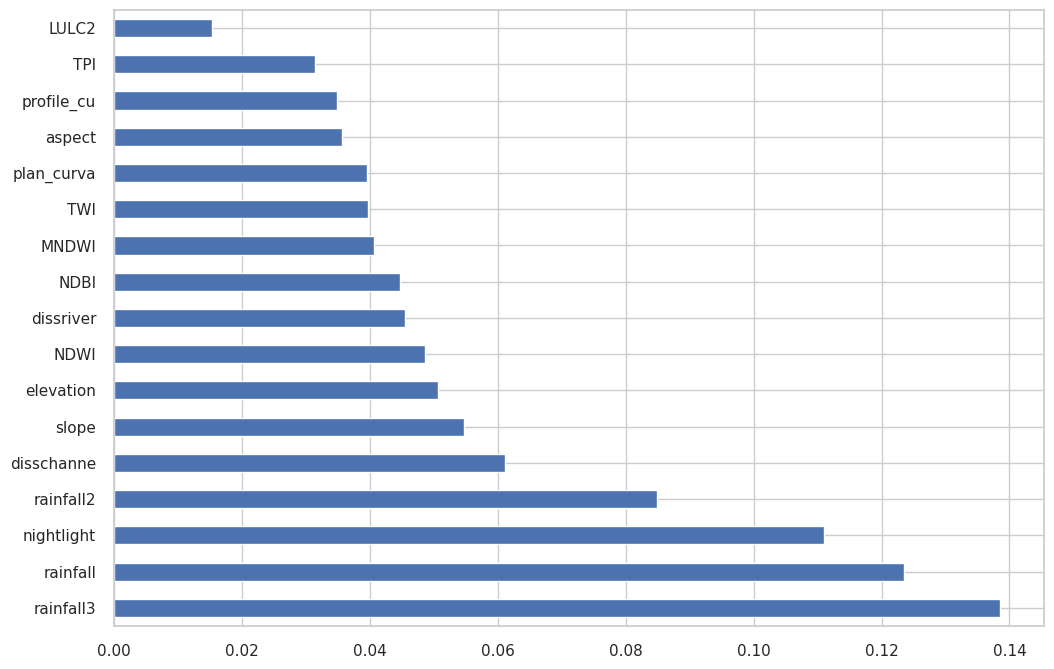

In [134]:
feature_imp.plot.barh()

# Logistic Regression

In [182]:
model_lr = LogisticRegression(penalty= 'l1', random_state= 42, solver= 'liblinear')
model_lr.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [183]:
y_pred_lr = model_lr.predict(x_test)

In [184]:
print(classification_report(y_test, y_pred_lr, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.67      0.57      0.61        46
       flood       0.62      0.72      0.67        46

    accuracy                           0.64        92
   macro avg       0.64      0.64      0.64        92
weighted avg       0.64      0.64      0.64        92



In [185]:
print(accuracy_score(y_test, y_pred_lr))

0.6413043478260869


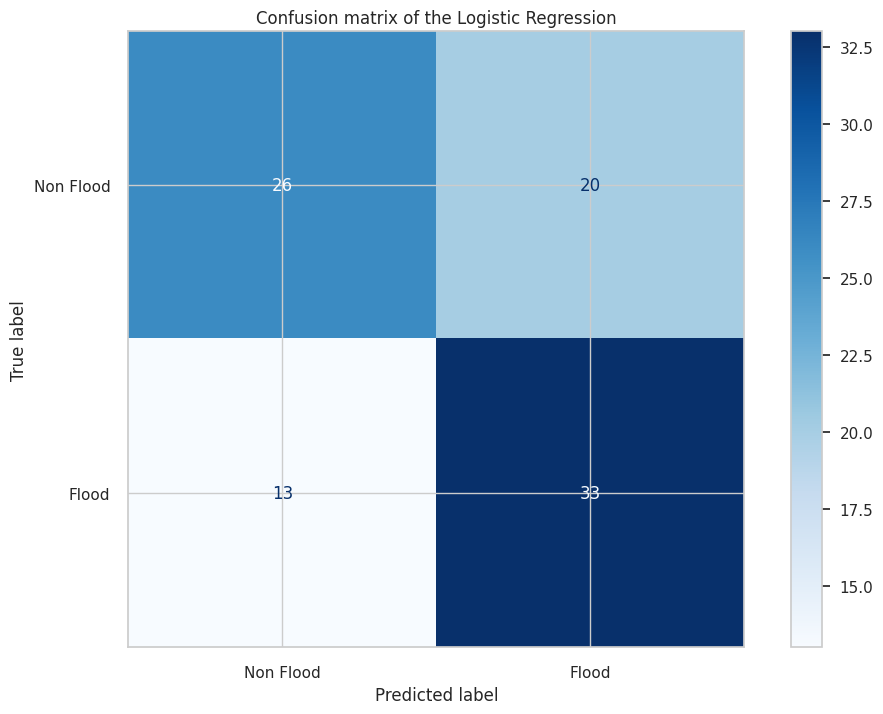

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Logistic Regression')
plt.show()

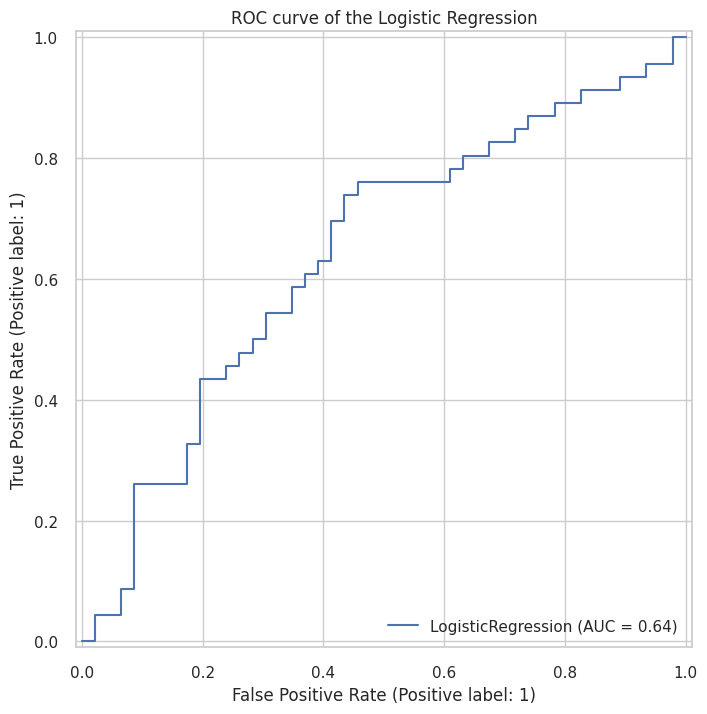

In [187]:
# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_lr, x_test, y_test, #alpha=8,
                               )
plt.title('ROC curve of the Logistic Regression')
plt.show()

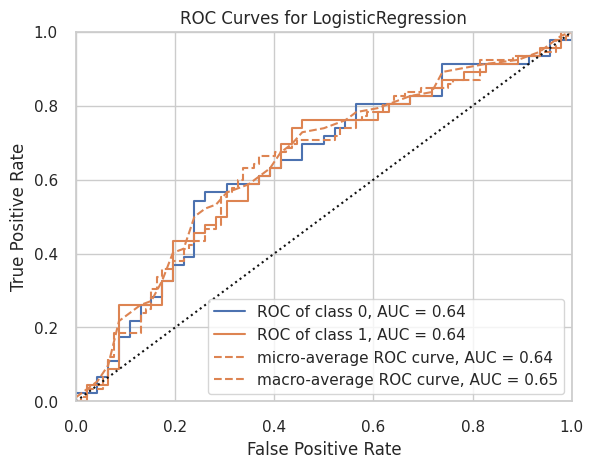

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [188]:
plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    model_lr,
    is_fitted=True
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [189]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, y_pred_lr))

0.28260869565217395


In [190]:
result_lr = stack.predict_proba(model_lr)

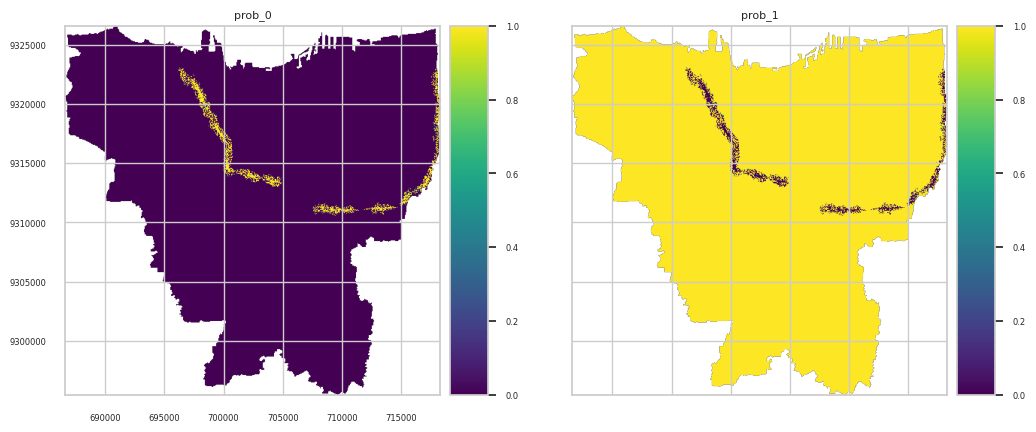

In [191]:
result_lr.plot()
plt.show()

In [193]:
result_lr.write(r"logistic regression susceptibility.tif")

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [logistic regression susceptibility.tif, logis...
2        rows                                               1040
3        cols                                               1057
4         res                                       (30.0, 30.0)
5  nodatavals  [-3.4028234663852886e+38, -3.4028234663852886e...


# Support Vector Machines

In [192]:
model_svm = SVC(probability= True, kernel='linear', random_state=42)
model_svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [195]:
y_pred_svm = model_svm.predict(x_test)

In [196]:
print(classification_report(y_test, y_pred_svm, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.60      0.57      0.58        46
       flood       0.59      0.63      0.61        46

    accuracy                           0.60        92
   macro avg       0.60      0.60      0.60        92
weighted avg       0.60      0.60      0.60        92



In [197]:
print(accuracy_score(y_test, y_pred_svm))

0.5978260869565217


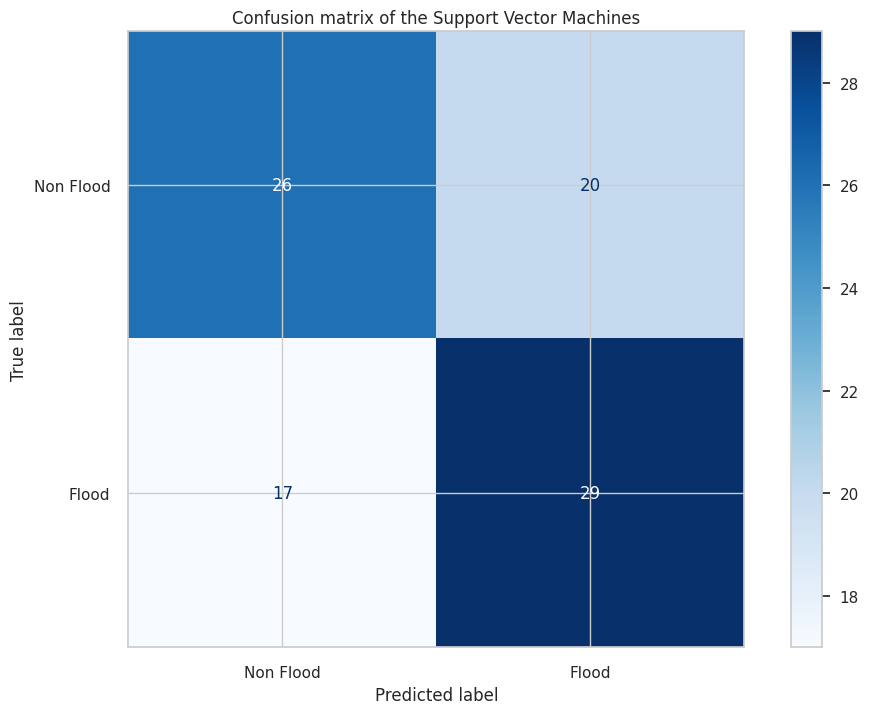

In [198]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Support Vector Machines')
plt.show()

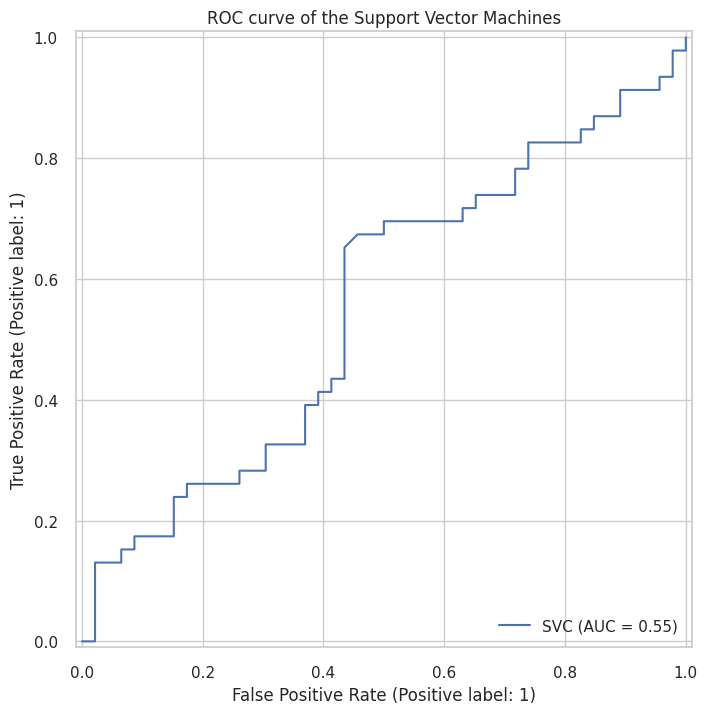

In [199]:
# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_svm, x_test, y_test, #alpha=8,
                               )
plt.title('ROC curve of the Support Vector Machines')
plt.show()

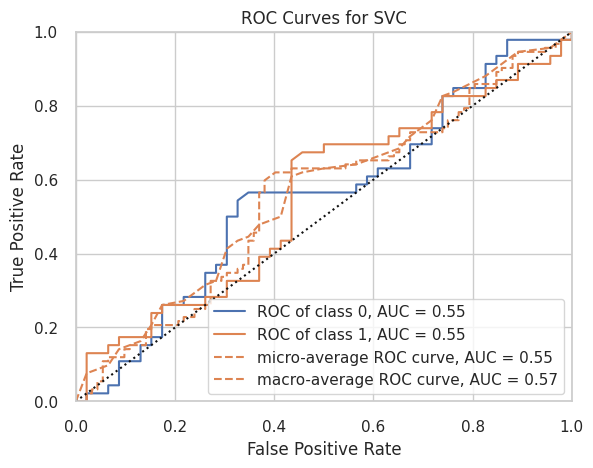

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [200]:
plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    model_svm,
    is_fitted=True
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [201]:
print(cohen_kappa_score(y_test, y_pred_svm))

0.19565217391304346


In [203]:
result_svm = stack.predict_proba(model_svm)

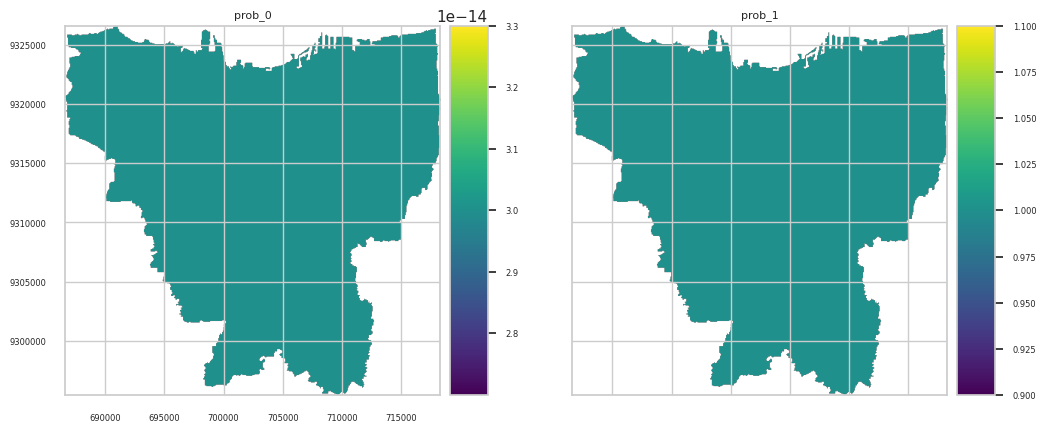

In [204]:
result_svm.plot()
plt.show()

In [205]:
result_svm.write(r"support vector machines susceptibility.tif")

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [support vector machines susceptibility.tif, s...
2        rows                                               1040
3        cols                                               1057
4         res                                       (30.0, 30.0)
5  nodatavals  [-3.4028234663852886e+38, -3.4028234663852886e...


### catatan:

#### 1. Random Rorest
Hasil ketika menggunakan LULC kode biasa, kategorial lebih bagus visualnya, namun akurasi lebih rendah (0,88) sedang akurasi untuk LULC yang dibobotkan adalah (0,89) namun visualisasinya lebih rendah probabilitasnya

#### 2. Logistic Regression
- Akurasi rendah. Model harus diperbaiki ntah parameter penalty, solver dengan membuat fungsi
- Peta aneh hasilnya jelek

#### 3. Support Vector Machines
- Akurasi rendah.Model harus diperbaiki dengan membuat fungsi, perbaikan parameter kernel, dll. sama kayak logistic regression
- Peta aneh hasilnya jelek

> "Model 2 dan 3 diperbaiki parameter training modelnya, kayak repositorinya angelinkatula"

##### Sabtu, 2th Agustus 2025